In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from apify_client import ApifyClient

In [11]:
load_dotenv()

True

**Connect_API**

In [ ]:
client = ApifyClient(os.getenv("API_TOKEN"))

**Setting_Data**

In [13]:
actor_id = "maxcopell/tripadvisor-reviews"
rating_set = ["5","4","3","2","1"] #Required rating
date = "2023-12-01" #Start Date
url_set ="https://www.tripadvisor.co.uk/Hotel_Review-g293916-d2318761-Reviews-Eastin_Grand_Hotel_Sathorn-Bangkok.html" # Preferred hotel

#Prepare Actor input
run_input = {
    "startUrls": [{ "url": url_set }],
    "maxItemsPerQuery": 9200,
    "scrapeReviewerInfo": True,
    "lastReviewDate": date,
    "reviewRatings": rating_set,
    "reviewsLanguages": ["en"],     # Preferred language
}

**Web_Scraping:apify**

In [14]:
run = client.actor(actor_id).call(run_input=run_input)

**Retrieve_information**

In [15]:
dataset_id = run["defaultDatasetId"]
dataset = client.dataset(dataset_id)
dataset_items = dataset.list_items()

**Variables**

In [16]:
url_ls = []
user_ls = []
title_ls = []
text_ls = []
travelDate_ls = []
rating_ls = []
#date start/end
start_date = "2023-12"     
end_date = "2024-02"

**Data_extraction**

In [17]:
for item in dataset_items.items:
    # print(item.get("url"))
    # print(item.get("user")["name"])
    # print(item.get("title"))
    # print(item.get("text"))
    # print(item.get("travelDate"))
    # print(item.get("rating"))
    
    url = item.get("url")
    user = item.get("user")["name"]
    title = item.get("title")
    text = item.get("text")
    travelDate = item.get("travelDate")
    rating = item.get("rating")

    url_ls.append(url)
    user_ls.append(user)
    title_ls.append(title)
    text_ls.append(text)
    travelDate_ls.append(travelDate)
    rating_ls.append(rating)


**Create_Dataframe**

In [18]:
df = pd.DataFrame({"#PAGE_URL": url_ls, "reviewer-name": user_ls , "review-title":title_ls,"detailed-review":text_ls, "date-of-stay":travelDate_ls,"rating":rating_ls})
print(df)

                                             #PAGE_URL        reviewer-name  \
0    https://www.tripadvisor.com/ShowUserReviews-g2...         Foodienburgh   
1    https://www.tripadvisor.com/ShowUserReviews-g2...                Ogi S   
2    https://www.tripadvisor.com/ShowUserReviews-g2...  JasurbekNurgiljonov   
3    https://www.tripadvisor.com/ShowUserReviews-g2...                大我　竜二   
4    https://www.tripadvisor.com/ShowUserReviews-g2...            Onanong D   
..                                                 ...                  ...   
287  https://www.tripadvisor.com/ShowUserReviews-g2...           ssunny2023   
288  https://www.tripadvisor.com/ShowUserReviews-g2...               Drax69   
289  https://www.tripadvisor.com/ShowUserReviews-g2...       aevmiranda2023   
290  https://www.tripadvisor.com/ShowUserReviews-g2...        lindalevesque   
291  https://www.tripadvisor.com/ShowUserReviews-g2...          Seb Zaidman   

                                          review-ti

**Clean_Data**

In [19]:
mask = (df["date-of-stay"] >= start_date) & (df["date-of-stay"] <= end_date)
filtered_df = df.loc[mask]
filtered_df = filtered_df.reset_index(drop=True)
print(filtered_df)

                                            #PAGE_URL     reviewer-name  \
0   https://www.tripadvisor.com/ShowUserReviews-g2...          Louise J   
1   https://www.tripadvisor.com/ShowUserReviews-g2...           Harry H   
2   https://www.tripadvisor.com/ShowUserReviews-g2...         sparkysox   
3   https://www.tripadvisor.com/ShowUserReviews-g2...  pgunnarrosenlund   
4   https://www.tripadvisor.com/ShowUserReviews-g2...           jimles7   
..                                                ...               ...   
71  https://www.tripadvisor.com/ShowUserReviews-g2...            Ebru Y   
72  https://www.tripadvisor.com/ShowUserReviews-g2...          El Chapo   
73  https://www.tripadvisor.com/ShowUserReviews-g2...           HCWEire   
74  https://www.tripadvisor.com/ShowUserReviews-g2...      Mobile180807   
75  https://www.tripadvisor.com/ShowUserReviews-g2...            Drax69   

                                         review-title  \
0                                      Ama

**Save_Files**

In [ ]:
filtered_df.to_excel('HotelReview.xlsx') # clean
# df.to_excel('HotelReview.xlsx') # not clean

**Data Aggregation**

In [21]:
average_rating = filtered_df["rating"].mean()
highest_rating = filtered_df["rating"].max()
lowest_rating = filtered_df["rating"].min()

In [22]:
print(f"Average Rating: {average_rating}")
print(f"Highest Rating: {highest_rating}")
print(f"Lowest Rating: {lowest_rating}")

Average Rating: 4.907894736842105
Highest Rating: 5
Lowest Rating: 4


**Data Visualization**

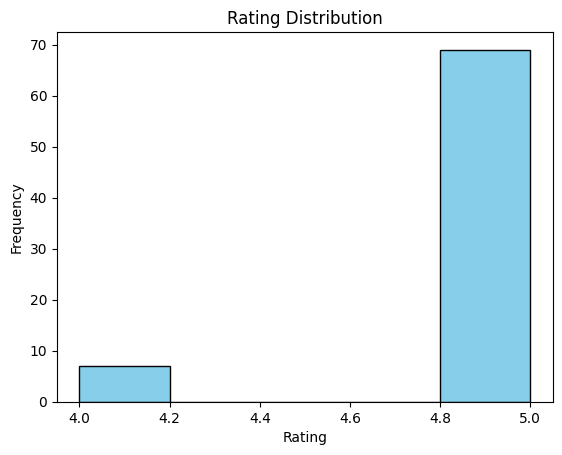

In [23]:
plt.hist(filtered_df["rating"], bins=5, color='skyblue', edgecolor='black')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [24]:
# ตรวจสอบและแปลงคอลัมน์วันที่ให้เป็น datetime
df["date-of-stay"] = pd.to_datetime(df["date-of-stay"], errors='coerce')

# ลบข้อมูลที่ไม่สามารถแปลงวันที่ได้
df = df.dropna(subset=["date-of-stay"])

# สร้างคอลัมน์เดือนจากวันที่
df["Month"] = df["date-of-stay"].dt.to_period("M")

monthly_avg = df.groupby("Month")["rating"].mean()

**Data Visualization**

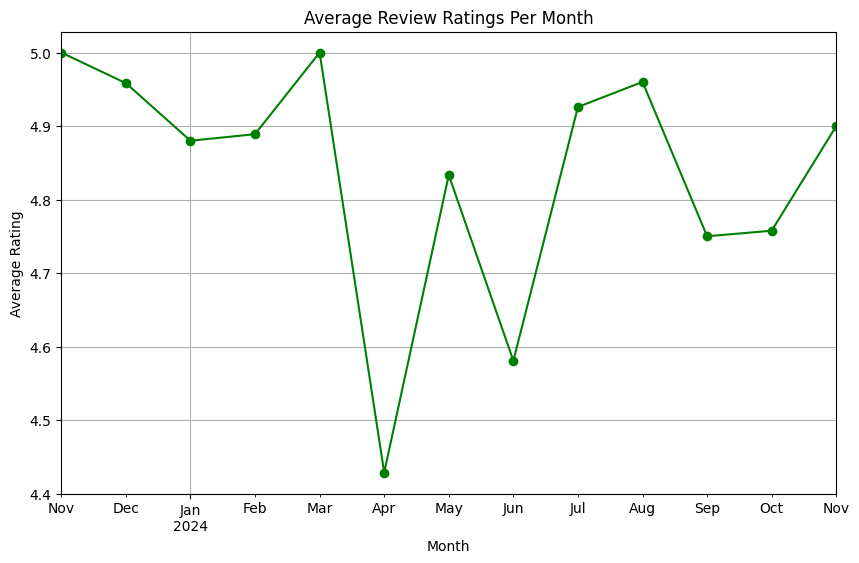

In [25]:
plt.figure(figsize=(10, 6))
monthly_avg.plot(marker='o', color='green', linestyle='-')
plt.title("Average Review Ratings Per Month")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()